## This notebook reloads previously saved models and prints the evaluation for comparison

In [1]:
# Imports

import tensorflow as tf
import numpy as np
import pandas as pd

import os

import sys
sys.path.append('..')
from helperfunctions import modelhelper as mh

TARGET_VAR = "dx_tertiary"
IMAGE_SIZE = (224, 224) # Change to fit your model

In [2]:
MODEL_PATH = "../models/"

In [3]:
# Load test_df from file
test_df = pd.read_csv("../data/processed/test_from_Metadata_processed.csv")

In [4]:
# List all the models in MODEL_PATH
model_list = os.listdir(MODEL_PATH)

# just keep elements with -h5 extension
model_list = [model for model in model_list if model[-3:] == ".h5"]

In [5]:
custom_objects = {
    'f1_score': mh.f1_score
    #'focal_loss': mh.focal_loss_multiclass,
    #add more if needed
}


Loading file: 'model_2023-10-06 12:51:15.274704.h5'
Evaluation model: 'Resnet50_tertiary_earlystopping_augmentation_in_train_data_generator'...
Image size: (224, 224)
Target variable is set to: dx_tertiary


 > Evaluating model Resnet50_tertiary_earlystopping_augmentation_in_train_data_generator:
 > Loading test images...
 > Test images loaded.


 > Converting labels to one hot format...
 > Getting model predictions...
32/32 [==============================] - 115s 3s/step
 > Model predictions obtained.
 > Macro AUC: 0.3401711803298062
 > Micro AUC: 0.6960017091565371


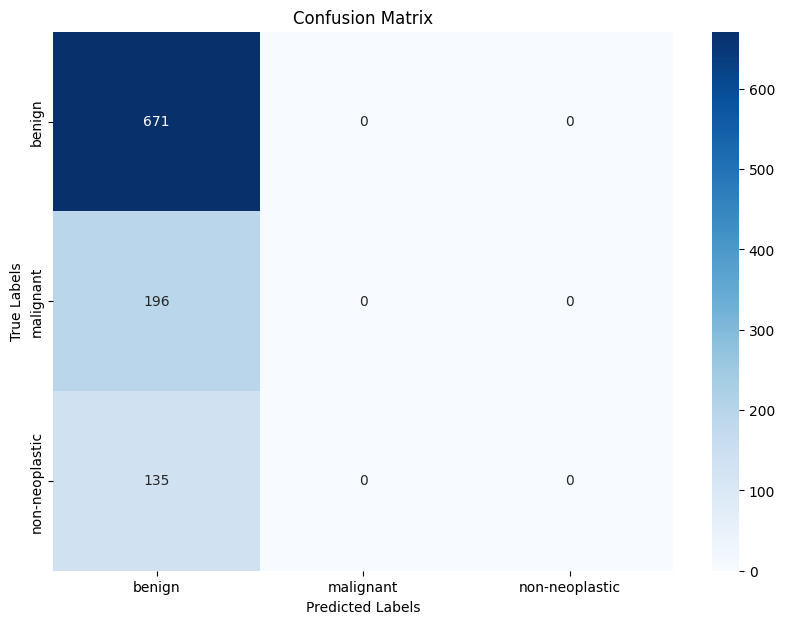



 > Computing classification report...
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       671
           1       0.00      0.00      0.00       196
           2       0.00      0.00      0.00       135

    accuracy                           0.67      1002
   macro avg       0.22      0.33      0.27      1002
weighted avg       0.45      0.67      0.54      1002

 > Evaluating model on test set...


/Users/janicepelzer/Documents/neuefische/capstone-healthy-skin/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janicepelzer/Documents/neuefische/capstone-healthy-skin/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/janicepelzer/Documents/neuefische/capstone-healthy-skin/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. U

32/32 [==============================] - 110s 3s/step - loss: 1.0685 - accuracy: 0.6697 - f1_score: 0.6703
loss: 1.068455457687378
accuracy: 0.6696606874465942
f1_score: 0.6703124642372131
 > Done.


Loading file: 'model_2023-10-09 04:09:54.318425.h5'
Evaluation model: 'Resnet50_tert_brightness_channelshift_dropout02_adam_lr_scheduler'...
Image size: (224, 224)
Target variable is set to: dx_tertiary


 > Evaluating model Resnet50_tert_brightness_channelshift_dropout02_adam_lr_scheduler:
 > Loading test images...
 > Test images loaded.


 > Converting labels to one hot format...
 > Getting model predictions...
32/32 [==============================] - 126s 4s/step
 > Model predictions obtained.
 > Macro AUC: 0.9247638181633268
 > Micro AUC: 0.9347465249142434


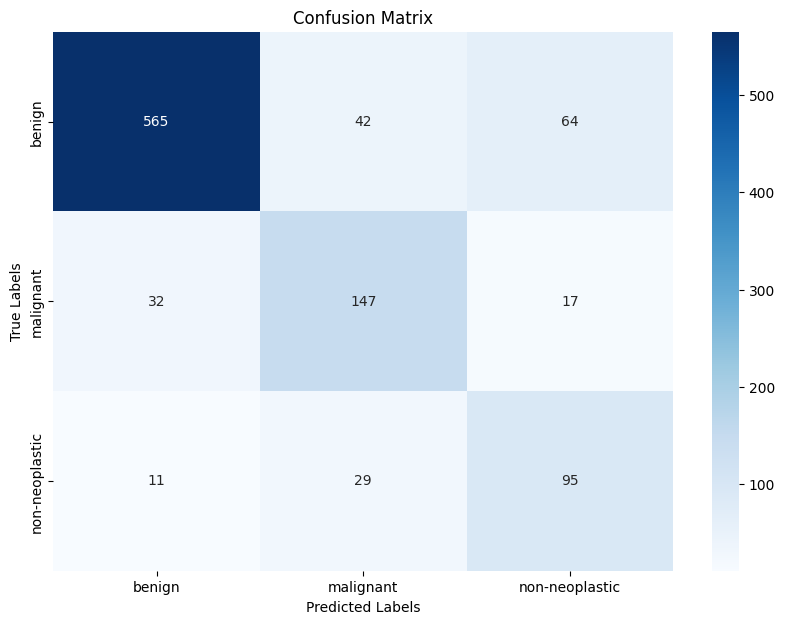



 > Computing classification report...
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       671
           1       0.67      0.75      0.71       196
           2       0.54      0.70      0.61       135

    accuracy                           0.81      1002
   macro avg       0.71      0.77      0.73      1002
weighted avg       0.83      0.81      0.81      1002

 > Evaluating model on test set...
32/32 [==============================] - 134s 4s/step - loss: 0.9180 - accuracy: 0.8054 - f1_score: 0.8028
loss: 0.9179559946060181
accuracy: 0.8053892254829407
f1_score: 0.8027902245521545
 > Done.


Loading file: 'model_2023-10-05 00:10:39.387268.h5'
Evaluation model: 'ResNet50_pretrained_7_classes_updated_architecture_bigger_training_set'...
Image size: (224, 224)
Target variable is set to: dx_tertiary


 > Evaluating model ResNet50_pretrained_7_classes_updated_architecture_bigger_training_set:
 > Loading test images...
 > Test images 

IndexError: index 3 is out of bounds for axis 1 with size 3

In [7]:
for file_name in model_list:
    # load the model
    model = tf.keras.models.load_model(MODEL_PATH + file_name, custom_objects=custom_objects)
    print(f"Loading file: '{file_name}'")
    # get the model name
    model_name = model.name
    print(f"Evaluation model: '{model_name}'...")
    # get the image dimension from the loaded model
    IMAGE_SIZE = model.input_shape[1:3]
    print(f"Image size: {IMAGE_SIZE}")
    # get the target variable from global variable
    print(f"Target variable is set to: {TARGET_VAR}")
    print("\n")
    mh.model_accuracy_on_test(model, test_df, TARGET_VAR, IMAGE_SIZE)
    
    print("===="*10)
    print("\n")

In [ ]:
test_df.shape

(2003, 10)